# Imports #

In [1]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

import torch
import torchvision

import numpy as np

import cv2

# Utils #

In [2]:
affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR

def deskew(img):
    img_size = img.shape[0]
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*img_size*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(img_size, img_size),flags=affine_flags)
    return img

def mnist_tiles(data):
    rows_count = data.shape[0]
    cols_count = data.shape[1]
    tile_height = data.shape[2]
    tile_width = data.shape[3]
    space_between_tiles = 2

    xDim = (tile_width + space_between_tiles)* rows_count - space_between_tiles
    yDim = (tile_height + space_between_tiles)* cols_count - space_between_tiles
    img_matrix = np.empty(shape=( xDim, yDim ))
    img_matrix.fill(np.nan)

    for i in range(cols_count):
        for j in range(rows_count):
            x1 = j*(tile_width+space_between_tiles)
            x2 = x1 + tile_width
            y1 = i*(tile_height+space_between_tiles)
            y2 = y1 + tile_height
            img_matrix[x1:x2,y1:y2] = data[j,i]

    return img_matrix

# Data loading #

In [3]:
mnist_data_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0], [.5]),
    torchvision.transforms.Lambda(lambda x: torch.reshape(x, (28,28))),
    torchvision.transforms.Lambda(lambda x: torch.tensor(deskew(x.numpy()))),
])

mnist_train_set = torchvision.datasets.mnist.MNIST("./data", train=True, download=True, transform = mnist_data_transform)
mnist_test_set = torchvision.datasets.mnist.MNIST("./data", train=False, download=True, transform = mnist_data_transform)

BATCH_SIZE = 100

mnist_train_dataloader = torch.utils.data.DataLoader(mnist_train_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
mnist_test_dataloader = torch.utils.data.DataLoader(mnist_test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

<IPython.core.display.Javascript object>


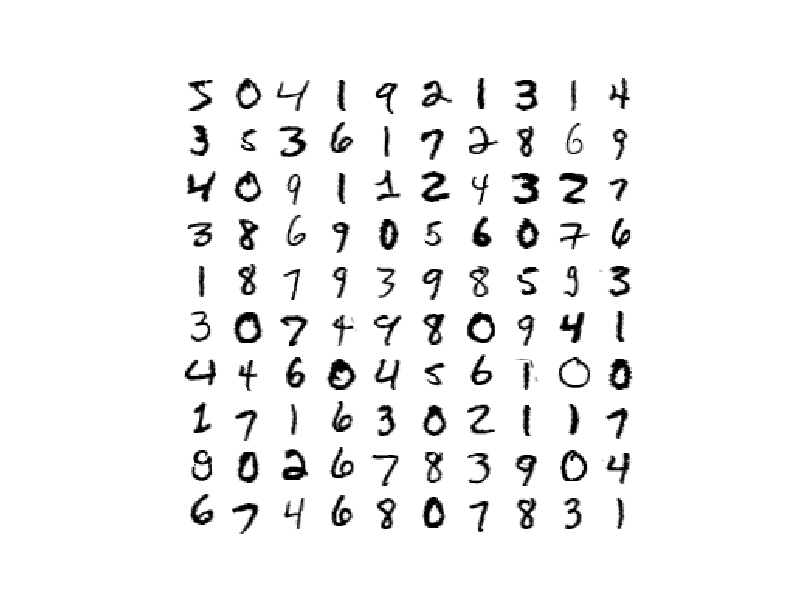

In [4]:
first_batch_data, first_batch_target = next(iter(mnist_train_dataloader))
first_batch_tiles = mnist_tiles(first_batch_data.numpy().reshape(BATCH_SIZE//10, -1, 28, 28))

plt.axis('off')
plt.imshow(first_batch_tiles, cmap='gray_r', interpolation='none')
plt.show()